In [38]:
from DeepVCF import biopandas as bpd
from DeepVCF import pathing
from DeepVCF.core import DeepVCF

bacteria = [
    'c_difficile',  # !
    'e_coli',
    'klebsiella',  # !
    'listeria',
    'neisseria',
    'salmonella',  # !
    'staphylococcus',
    'streptococcus',
    'tb'
]
deepvcf = DeepVCF()

=== No GPU Detected ===


In [51]:
name_mapping = {
    '2percent.bcftools': 'BCF-2',
    '10percent.bcftools': 'BCF-10',
    '2percent.deepvcf': 'DVCF-2',
    '10percent.deepvcf': 'DVCF-10',
}
hom_alt = []
het = []
for name in bacteria:
    folder = pathing(name)
    for predicted_vcf in folder.glob('*.vcf'):
        real_vcf = pathing(folder / ('test/' + predicted_vcf.name.split('.')[0] + '.mutations.vcf'))
        plot_name = predicted_vcf.stem.split('.')[-1]
        be_rate = predicted_vcf.stem.split('percent')[0].split('-')[-1]
        # print(plot_name, predicted_vcf, predicted_vcf.name)
        metrics = deepvcf.validation(real_vcf=real_vcf, predicted_vcf=predicted_vcf)
        hom_alt.append({
            **{'tool': plot_name, 'species': name, 'base-error-rate': be_rate},
            **metrics['hom_alt'],
        })
        het.append({
            **{'tool': plot_name, 'species': name, 'base-error-rate': be_rate},
            **metrics['het'],
        })

In [53]:
hom_alt = pd.DataFrame(hom_alt).round(3)
het = pd.DataFrame(het).round(3)
hom_alt.sort_values(['F1'], ascending=False).to_csv('homozygous_alternative_results.csv', index=False)
het.sort_values(['F1'], ascending=False).to_csv('heterozygous_alternative_results.csv', index=False)

# Restart jupyter kernel and run only below this. Bug in biopandas removes tools from pandas sense it does a name check.

In [2]:
import pandas as pd
from matplotlib import rcParams, pyplot as plt
import dataframe_image as dfi
import seaborn as sns

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
name_mapping = {
    '2percent.bcftools': 'BCF-2',
    '10percent.bcftools': 'BCF-10',
    '2percent.deepvcf': 'DVCF-2',
    '10percent.deepvcf': 'DVCF-10',
}
hom_alt = pd.read_csv('heterozygous_alternative_results.csv')
het = pd.read_csv('homozygous_alternative_results.csv')

In [106]:
dfi.export(hom_alt.style.background_gradient(), 'images/hom_alt_scoreboard.png')
hom_alt.style.background_gradient()

,tool,species,base-error-rate,Sensitivity,PPV,Accuracy,F1
0,bcftools,staphylococcus,2,0.989000,1.000000,0.993000,0.995000
1,bcftools,listeria,2,0.988000,1.000000,0.993000,0.994000
2,bcftools,tb,2,0.988000,1.000000,0.992000,0.994000
3,bcftools,streptococcus,2,0.987000,1.000000,0.991000,0.993000
4,bcftools,e_coli,2,0.987000,1.000000,0.992000,0.993000
5,bcftools,c_difficile,2,0.984000,1.000000,0.990000,0.992000
6,deepvcf,tb,2,0.991000,0.992000,0.989000,0.991000
7,deepvcf,e_coli,2,0.989000,0.992000,0.987000,0.990000
8,deepvcf,c_difficile,2,0.986000,0.993000,0.986000,0.990000
9,bcftools,klebsiella,2,0.979000,1.000000,0.987000,0.990000


In [105]:
dfi.export(het.style.background_gradient(), 'images/het_scoreboard.png')
het.style.background_gradient()

,tool,species,base-error-rate,Sensitivity,PPV,Accuracy,F1
0,bcftools,tb,2,0.996000,1.000000,0.998000,0.998000
1,bcftools,e_coli,2,0.994000,0.999000,0.998000,0.997000
2,bcftools,staphylococcus,2,0.993000,1.000000,0.998000,0.996000
3,bcftools,c_difficile,2,0.991000,1.000000,0.997000,0.995000
4,bcftools,klebsiella,2,0.989000,0.999000,0.996000,0.994000
5,bcftools,streptococcus,2,0.988000,1.000000,0.996000,0.994000
6,bcftools,listeria,2,0.989000,1.000000,0.996000,0.994000
7,deepvcf,tb,2,0.986000,0.998000,0.995000,0.992000
8,deepvcf,e_coli,2,0.985000,0.998000,0.994000,0.991000
9,deepvcf,klebsiella,2,0.983000,0.998000,0.994000,0.991000


In [65]:
hom_alt.head()

,tool,species,base-error-rate,Sensitivity,PPV,Accuracy,F1
0,bcftools,staphylococcus,2,0.989,1.0,0.993,0.995
1,bcftools,listeria,2,0.988,1.0,0.993,0.994
2,bcftools,tb,2,0.988,1.0,0.992,0.994
3,bcftools,streptococcus,2,0.987,1.0,0.991,0.993
4,bcftools,e_coli,2,0.987,1.0,0.992,0.993


In [5]:
het.head()

,tool,species,base-error-rate,Sensitivity,PPV,Accuracy,F1
0,bcftools,tb,2,0.996,1.000,0.998,0.998
1,bcftools,e_coli,2,0.994,0.999,0.998,0.997
2,bcftools,staphylococcus,2,0.993,1.000,0.998,0.996
3,bcftools,c_difficile,2,0.991,1.000,0.997,0.995
4,bcftools,klebsiella,2,0.989,0.999,0.996,0.994


In [150]:
hom_alt.groupby('tool').describe().unstack(1)

                        tool    
base-error-rate  count  bcftools    18.000000
                        deepvcf     18.000000
                 mean   bcftools     6.000000
                        deepvcf      6.000000
                 std    bcftools     4.115966
                                      ...    
F1               50%    deepvcf      0.985000
                 75%    bcftools     0.992750
                        deepvcf      0.988750
                 max    bcftools     0.995000
                        deepvcf      0.991000
Length: 80, dtype: float64

In [149]:
hom_alt

,tool,species,base-error-rate,Sensitivity,PPV,Accuracy,F1
0,bcftools,staphylococcus,2,0.989,1.000,0.993,0.995
1,bcftools,listeria,2,0.988,1.000,0.993,0.994
2,bcftools,tb,2,0.988,1.000,0.992,0.994
3,bcftools,streptococcus,2,0.987,1.000,0.991,0.993
4,bcftools,e_coli,2,0.987,1.000,0.992,0.993
5,bcftools,c_difficile,2,0.984,1.000,0.990,0.992
6,deepvcf,tb,2,0.991,0.992,0.989,0.991
7,deepvcf,e_coli,2,0.989,0.992,0.987,0.990
8,deepvcf,c_difficile,2,0.986,0.993,0.986,0.990
9,bcftools,klebsiella,2,0.979,1.000,0.987,0.990


In [158]:
pd.DataFrame([{**group.describe().rename(columns={'score':name}).round(3).to_dict(), **{'tool':name, 'base-error-rate': 10}}
 for name, group in hom_alt[(hom_alt['base-error-rate']==10)][['tool', 'F1']].groupby('F1')])

,F1,tool,base-error-rate
0,"{'count': 9.0, 'mean': 0.073, 'std': 0.003, 'm...",bcftools,10
1,"{'count': 9.0, 'mean': 0.979, 'std': 0.009, 'm...",deepvcf,10


In [219]:
def save_metrics(df, be_rate, file):
    df = df[df['base-error-rate']==be_rate][['tool']+metrics].groupby('tool').describe().transpose().reset_index()
    df = df[df.level_1.isin(['mean', 'min', 'max'])].rename(columns={'level_0':'ml_metric', 'level_1':'stat_metric'})
    df.reset_index(drop=True, inplace=True)
    df.rename_axis(None, axis=1, inplace=True)
    dfi.export(df.style.background_gradient(), file)
    return df.style.background_gradient()

In [240]:
df = hom_alt.copy()
be_rate = 2
file = f'images/Hom-Alt-BE{be_rate}-Describe.png'
save_metrics(df, be_rate, file)

,ml_metric,stat_metric,bcftools,deepvcf
0,Sensitivity,mean,0.981667,0.984556
1,Sensitivity,min,0.962000,0.971000
2,Sensitivity,max,0.989000,0.991000
3,PPV,mean,1.000000,0.984778
4,PPV,min,1.000000,0.957000
5,PPV,max,1.000000,0.994000
6,Accuracy,mean,0.988333,0.979667
7,Accuracy,min,0.976000,0.952000
8,Accuracy,max,0.993000,0.989000
9,F1,mean,0.990778,0.984778


In [221]:
df = hom_alt.copy()
be_rate = 10
file = f'images/Hom-Alt-BE{be_rate}-Describe.png'
save_metrics(df, be_rate, file)

,ml_metric,stat_metric,bcftools,deepvcf
0,Sensitivity,mean,0.038222,0.972778
1,Sensitivity,min,0.036000,0.963000
2,Sensitivity,max,0.042000,0.980000
3,PPV,mean,0.949000,0.985222
4,PPV,min,0.938000,0.964000
5,PPV,max,0.964000,0.994000
6,Accuracy,mean,0.291333,0.972111
7,Accuracy,min,0.283000,0.952000
8,Accuracy,max,0.302000,0.982000
9,F1,mean,0.073444,0.978778


In [222]:
df = het.copy()
be_rate = 2
file = f'images/Het-BE{be_rate}-Describe.png'
save_metrics(df, be_rate, file)

,ml_metric,stat_metric,bcftools,deepvcf
0,Sensitivity,mean,0.987667,0.978778
1,Sensitivity,min,0.972000,0.950000
2,Sensitivity,max,0.996000,0.986000
3,PPV,mean,0.999556,0.995667
4,PPV,min,0.999000,0.989000
5,PPV,max,1.000000,0.998000
6,Accuracy,mean,0.995778,0.991556
7,Accuracy,min,0.991000,0.980000
8,Accuracy,max,0.998000,0.995000
9,F1,mean,0.993444,0.987222


In [224]:
df = het.copy()
be_rate = 10
file = f'images/Het-BE{be_rate}-Describe.png'
save_metrics(df, be_rate, file)

,ml_metric,stat_metric,bcftools,deepvcf
0,Sensitivity,mean,0.720667,0.964778
1,Sensitivity,min,0.700000,0.946000
2,Sensitivity,max,0.737000,0.973000
3,PPV,mean,0.824000,0.994333
4,PPV,min,0.818000,0.984000
5,PPV,max,0.832000,1.000000
6,Accuracy,mean,0.647889,0.986333
7,Accuracy,min,0.640000,0.980000
8,Accuracy,max,0.658000,0.990000
9,F1,mean,0.768778,0.979444


# CatPlot!

In [34]:
# fig = plt.figure()
# fig.subplots_adjust(hspace=.1, wspace=.1)
sns.set_theme(style="ticks")
sns.set_context("paper")
sns.set(font_scale=1.2)  # crazy big

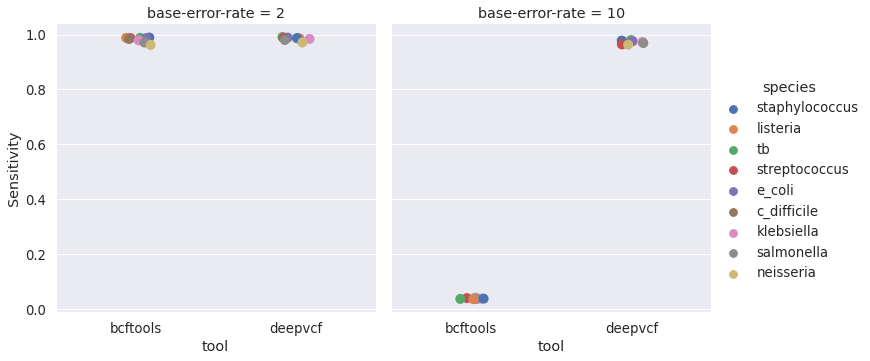

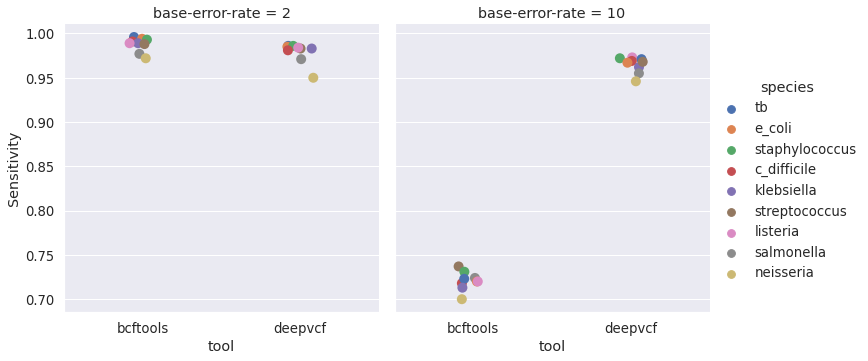

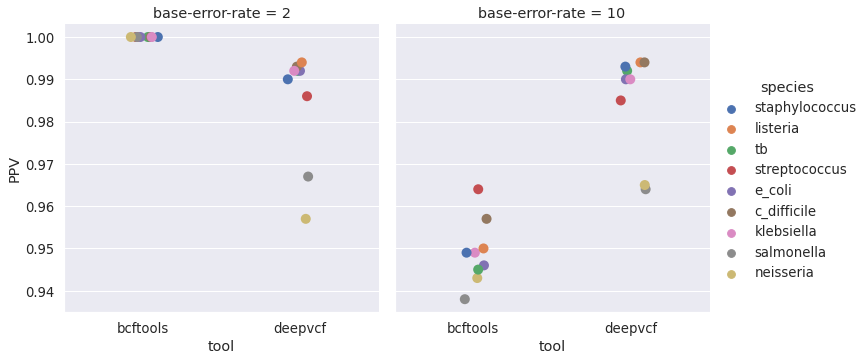

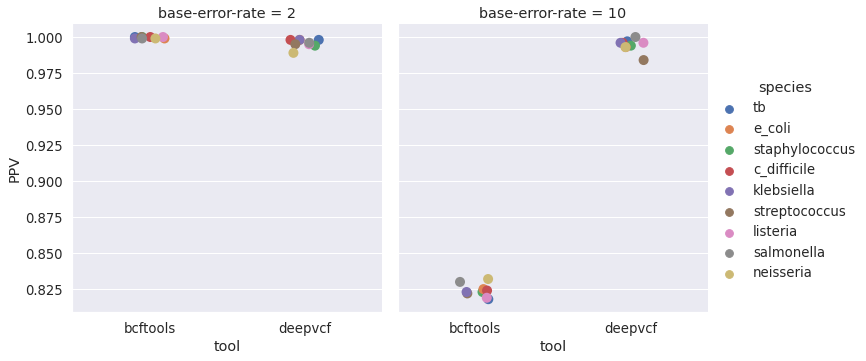

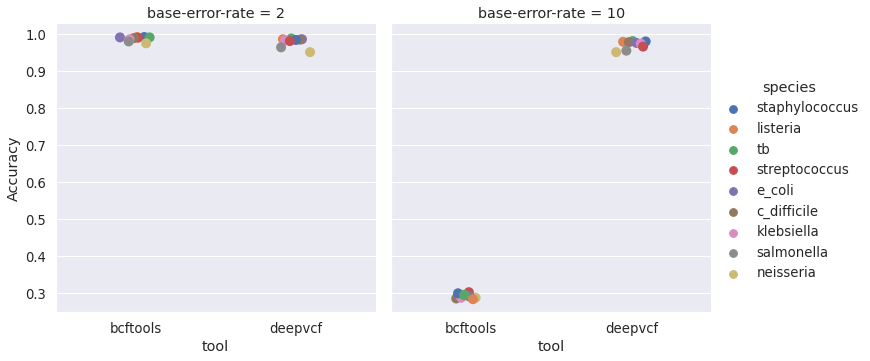

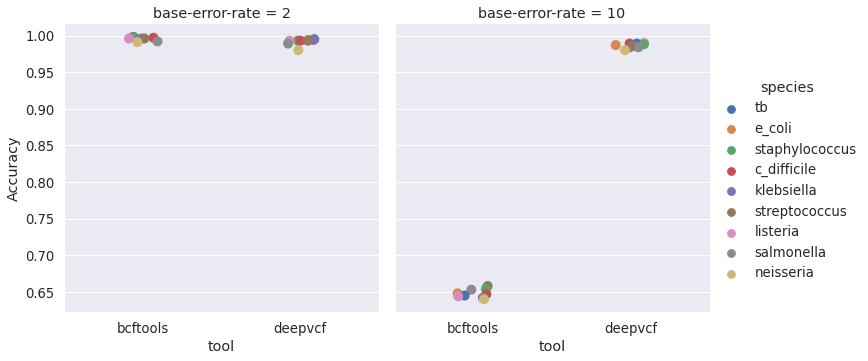

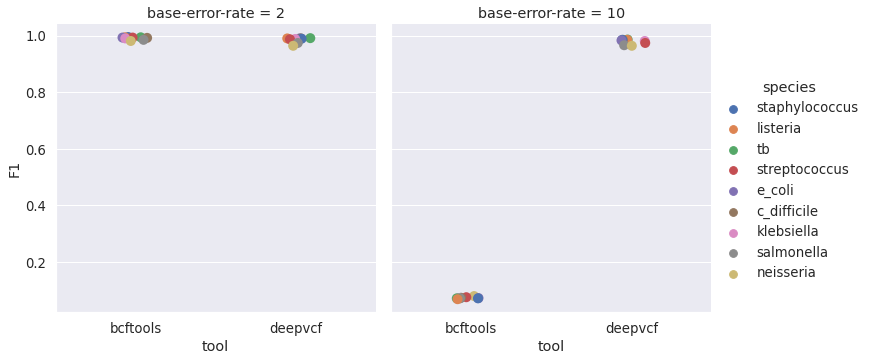

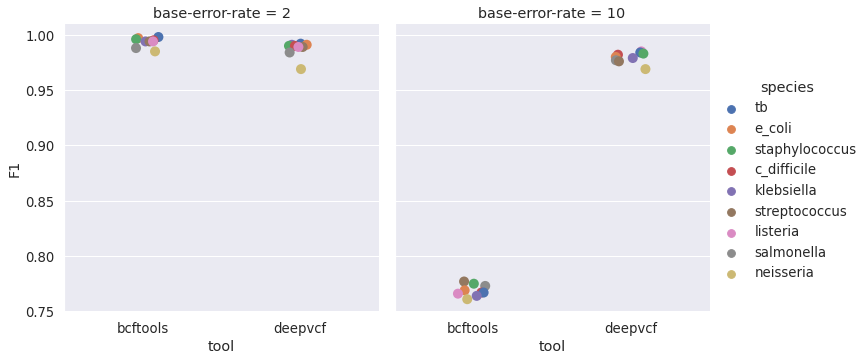

In [100]:
metrics = ['Sensitivity', 'PPV', 'Accuracy', 'F1']
for metric in metrics:
    snsplot = sns.catplot(x='tool', y=metric, data=hom_alt, col='base-error-rate', hue='species', order=['bcftools', 'deepvcf'], s=10)
    snsplot.savefig(f'images/{metric}-Hom-Alt-Cat.png')
    snsplot = sns.catplot(x='tool', y=metric, data=het, col='base-error-rate', hue='species', order=['bcftools', 'deepvcf'], s=10)
    snsplot.savefig(f'images/{metric}-Het-Cat.png')

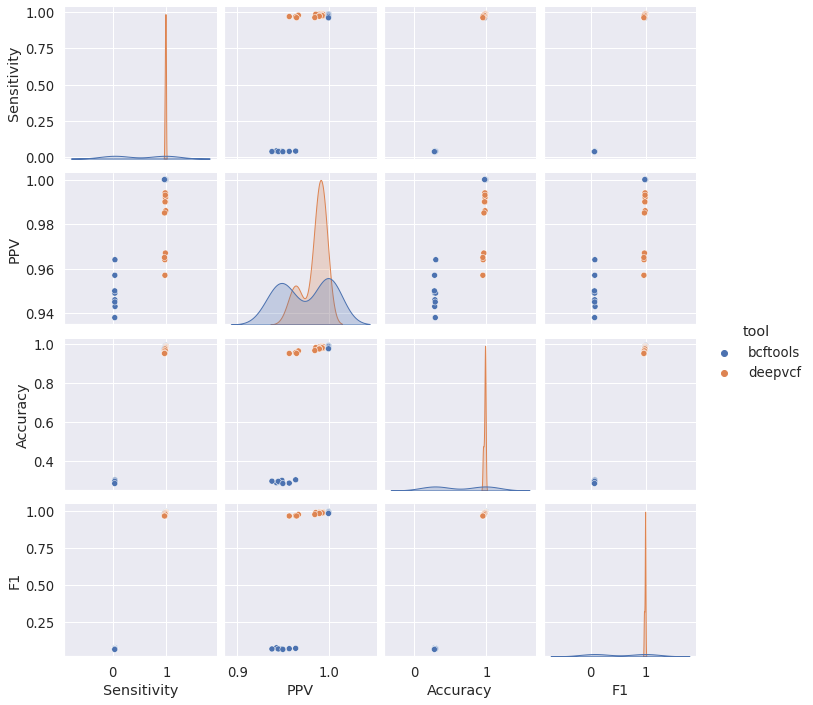

In [101]:
snsplot = sns.pairplot(hom_alt[['tool']+metrics], diag_kind="kde", hue='tool')
snsplot.savefig('images/Hom-Alt-PairPlot-Tools.png')

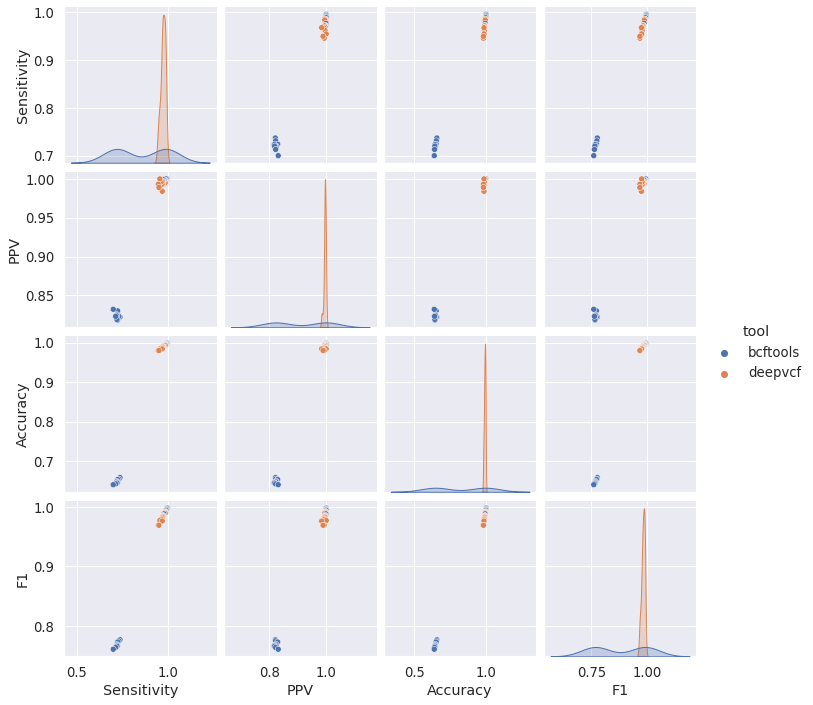

In [102]:
snsplot = sns.pairplot(het[['tool']+metrics], diag_kind="kde", hue='tool')
snsplot.savefig('images/Het-PairPlot-Tools.png')

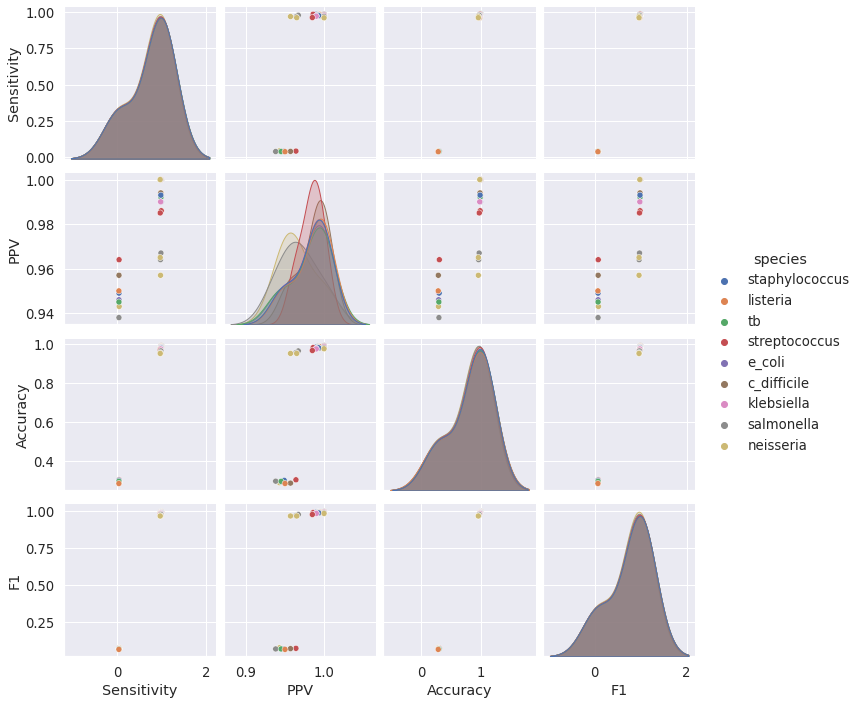

In [103]:
snsplot = sns.pairplot(hom_alt[['species']+metrics], diag_kind="kde", hue='species')
snsplot.savefig('images/Hom-Alt-PairPlot-Species.png')

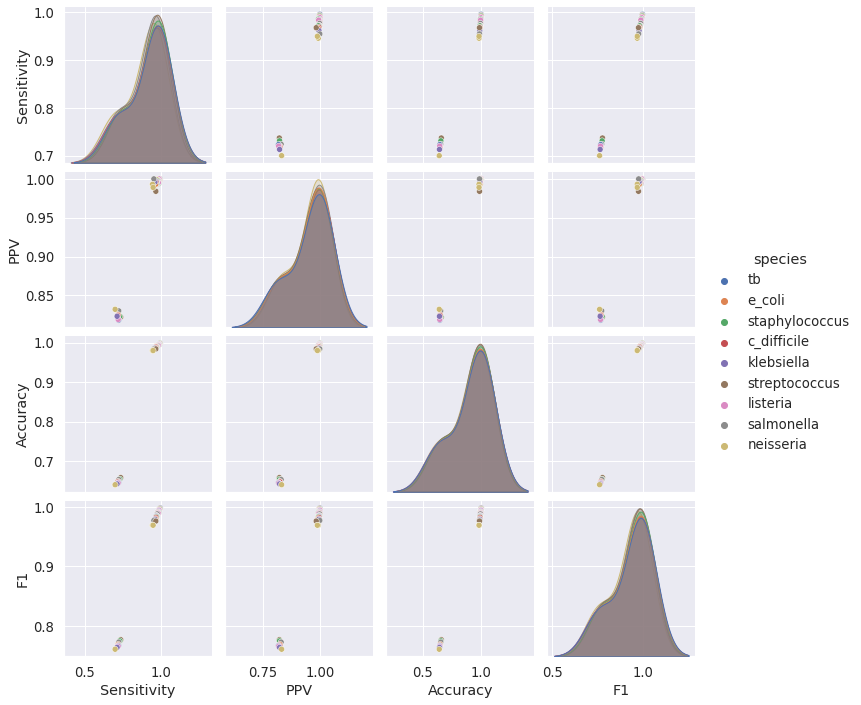

In [104]:
snsplot = sns.pairplot(het[['species']+metrics], diag_kind="kde", hue='species')
snsplot.savefig('images/Het-PairPlot-Species.png')

# Manual Time test because of issues where BCFtools took days to run human chromosome 21 and 22

In [238]:
pd.read_csv('../giab-metrics.csv').rename(columns={'Unnamed: 0': 'Metric'}).style.background_gradient()

,Metric,DeepVCf_hom_alt,DeepVCF_het,BCFtools_hom_alt,BCFtools_het
0,Sensitivity,0.971285,0.908741,0.083543,0.974025
1,PPV,0.707775,0.700577,0.998927,0.026114
2,Accuracy,0.873678,0.738300,0.720906,0.028905
3,F1,0.818852,0.791196,0.154190,0.050864


In [239]:
dfi.export(pd.read_csv('../giab-metrics.csv').rename(columns={'Unnamed: 0': 'Metric'}).style.background_gradient(), 'images/giab-metrics.png')